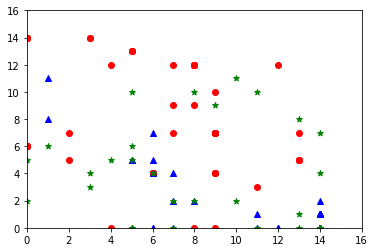

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('iris_data.csv')

%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

N = 15#linear size of 2D map
n_teacher = len(df) #教師データの数(学習回数)#行数
np.random.seed(100)#シード (種) を指定することで、発生する乱数をあらかじめ固定
dimension= 4#ベクトルの次元
i=0

def main():
    #初期ノード
    # N x N ×dimension の配列の乱数
    nodes = np.random.rand(N, N, dimension)#0.0~1.0の値で一様分布
        
    for x in range (N):
        for y in range(N):
            for z in range(dimension):
                M = df.iloc[:,z].max()
                m = df.iloc[:,z].min()
                nodes[x, y, z] =  (M - m) * nodes[x, y, z ] + m
                
                

    ax = plt.subplot()
    for i in range(n_teacher):#150回
        #教師信号
        teachers = np.array(df.loc[i,'SepalLength':'PetalWidth'].values) #X #150 * 4
        train(nodes, teachers)
        bmu = best_matching_unit(nodes, teachers)
        y = np.array(df.loc[:, ['Name']].values)

        if y[i]==[0]:#setosa
            col='red'
            mark = 'o'
            #ax.scatter(bmu[0],bmu[1],color='red', marker='o')
    
        elif y[i]==[1]:#versicolor
            col='blue'
            mark = '^'
            #ax.scatter(bmu[0],bmu[1],color='blue',marker='^')
        
        elif y[i]==[2]:#Virginia
            col='green'
            mark = '*'
            
        ax.scatter(bmu[0],bmu[1],color = col,marker=mark) 
        #plt.savefig(f'som{i}.png', dpi = 400, bbox_inches = 'tight')
    
    plt.xlim(0,N+1)
    plt.ylim(0,N+1)
    plt.show()
    
def train(nodes, teachers):
    
    bmu = best_matching_unit(nodes, teachers)#BMU:データに対し最も似ているベクトルを持つユニットあとで定義

    for x in range(N):
        for y in range(N):
            c = np.array([x,y])
            d = np.linalg.norm(c - bmu)#ユニットの位置とBMUとの距離
            L = learning_ratio(i)#学習時間を決定するパラメータ#iはe^(-t/λ)
            S = learning_radius(i, d)#更新するユニットがどの程度BMUの近傍にいるのかを表現
            for z in range(dimension):
                nodes[x, y, z] += L * S * (teachers[z] - nodes[x, y, z])#zはがくの長さなど

                
def best_matching_unit(nodes, teacher):
    norms = np.zeros((N,N))# N×Nの２次元配列を生成
    for x in range (N):
        for y in range(N):
            for z in range(dimension):
                norms[x, y] += (nodes[x,y,z] - teacher[z])**2
    
    bmu_1 = np.argmin(norms)#１次元配列で考えたとき何番目かを返す
    bmu = np.unravel_index(bmu_1,(N,N))#argminと組み合わせることで,もとの行列の何行何列目に最小値があるのかわかる

    return bmu 

def neighbourhood(t):
    halflife = float(n_teacher/4)#時定数
    initial = float(N/2)
    return initial*np.exp(-t/halflife)

def learning_ratio(t):
    halflife=float(n_teacher/4)#時定数
    initial=0.1#Lの初期値
    return initial*np.exp(-t/halflife)

def learning_radius(t, d):
    s=neighbourhood(t)
    return np.exp(-d**2/(2*s**2))

main()